In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib notebook

In [2]:
t = ascii.read('ASASSN-21qj_2013-2021.tbl')

In [3]:
t

ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,nb,na,cc_flags,ph_qual,qual_frame,mjd,allwise_cntr,w1mpro_allwise,w1sigmpro_allwise,w2mpro_allwise,w2sigmpro_allwise,w3mpro_allwise,w3sigmpro_allwise,w4mpro_allwise,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
deg,deg,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,,,,,,mjdate,,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,arcsec,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str4,str2,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
123.8469618,-38.9898445,0.0466,0.0404,0.0027,11.334,0.02,53.6,15.42,11.043,0.03,36.1,3.276,1,0,0000,AA,5,58227.64203649,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.353289,249.417649
123.8469547,-38.9898618,0.037,0.0395,-0.0072,11.241,0.019,57.4,15.2,10.948,0.023,47.5,3.349,1,0,0000,AA,0,58801.02847317,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.397111,241.992339
123.8469391,-38.9898479,0.0376,0.0418,-0.0088,11.224,0.018,58.7,13.72,10.93,0.023,46.4,3.344,1,0,0000,AA,5,58800.57056616,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.417193,250.910784
123.8469325,-38.9898302,0.0384,0.037,-0.0089,11.239,0.019,56.0,12.93,10.916,0.023,46.9,3.377,1,0,0000,AA,5,58800.50524178,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.41908,260.007272
123.8469426,-38.9898564,0.0365,0.0368,0.0043,11.226,0.019,57.4,12.71,10.894,0.022,48.8,3.699,1,0,0000,AA,5,58436.76748992,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.419181,246.516145
123.8469303,-38.9898186,0.0387,0.0418,-0.0112,11.233,0.02,53.0,12.48,10.941,0.023,47.9,3.789,1,0,0000,AA,10,58593.93732355,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.420025,265.772827
123.8469321,-38.9898533,0.0395,0.0453,-0.0132,11.236,0.02,54.5,16.15,10.902,0.023,47.0,3.608,1,0,0000,AA,5,58800.04720753,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.442223,249.360342
123.8469307,-38.9898532,0.0386,0.0352,-0.0115,11.224,0.018,61.9,15.69,10.883,0.023,48.2,3.19,1,0,0000,AA,10,58436.24400282,1238039401351044100,11.681,0.023,11.749,0.022,12.247,0.474,9.028,--,289913911,12.065,--,12.031,0.0393,11.987,0.0377,0.445765,249.581125


<IPython.core.display.Javascript object>


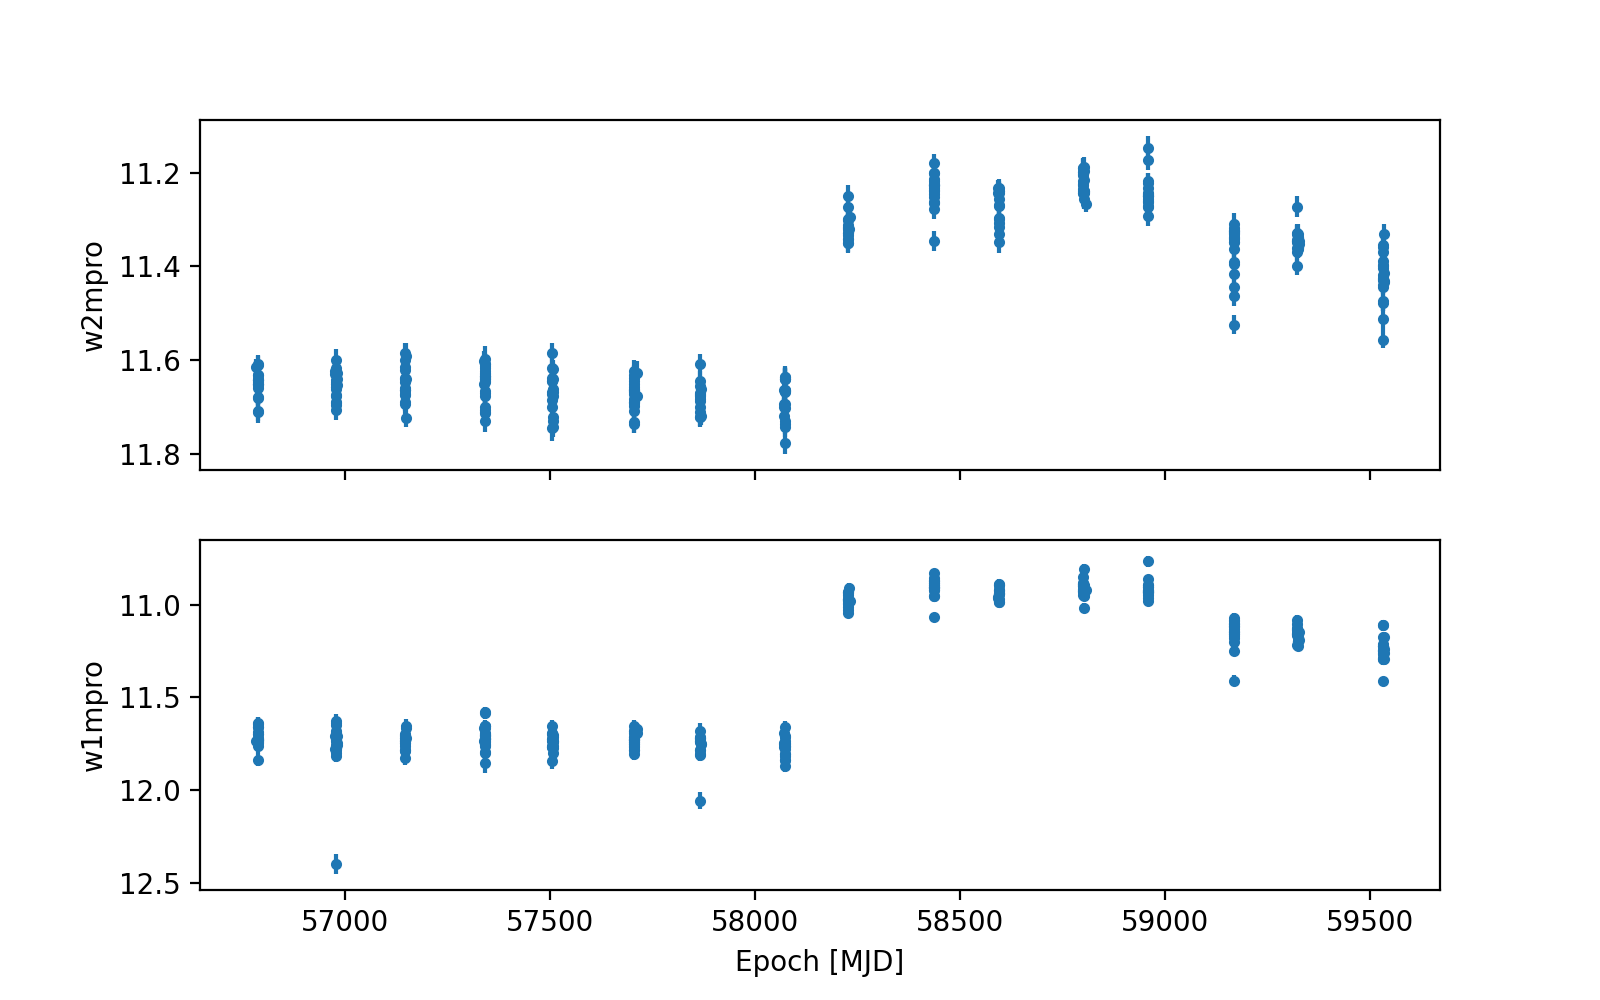

Text(0, 0.5, 'w1mpro')

In [14]:
fig, ax = plt.subplots(2,1,figsize=(8,5),sharex=True)
ax[0].errorbar(t['mjd'],t['w1mpro'],yerr=t['w1sigmpro'],fmt='.')
ax[0].invert_yaxis()
ax[1].errorbar(t['mjd'],t['w2mpro'],yerr=t['w2sigmpro'],fmt='.')
ax[1].invert_yaxis()
ax[1].set_xlabel('Epoch [MJD]')
ax[0].set_ylabel('w2mpro')
ax[1].set_ylabel('w1mpro')

## calculate weighted mean at each epoch



<IPython.core.display.Javascript object>


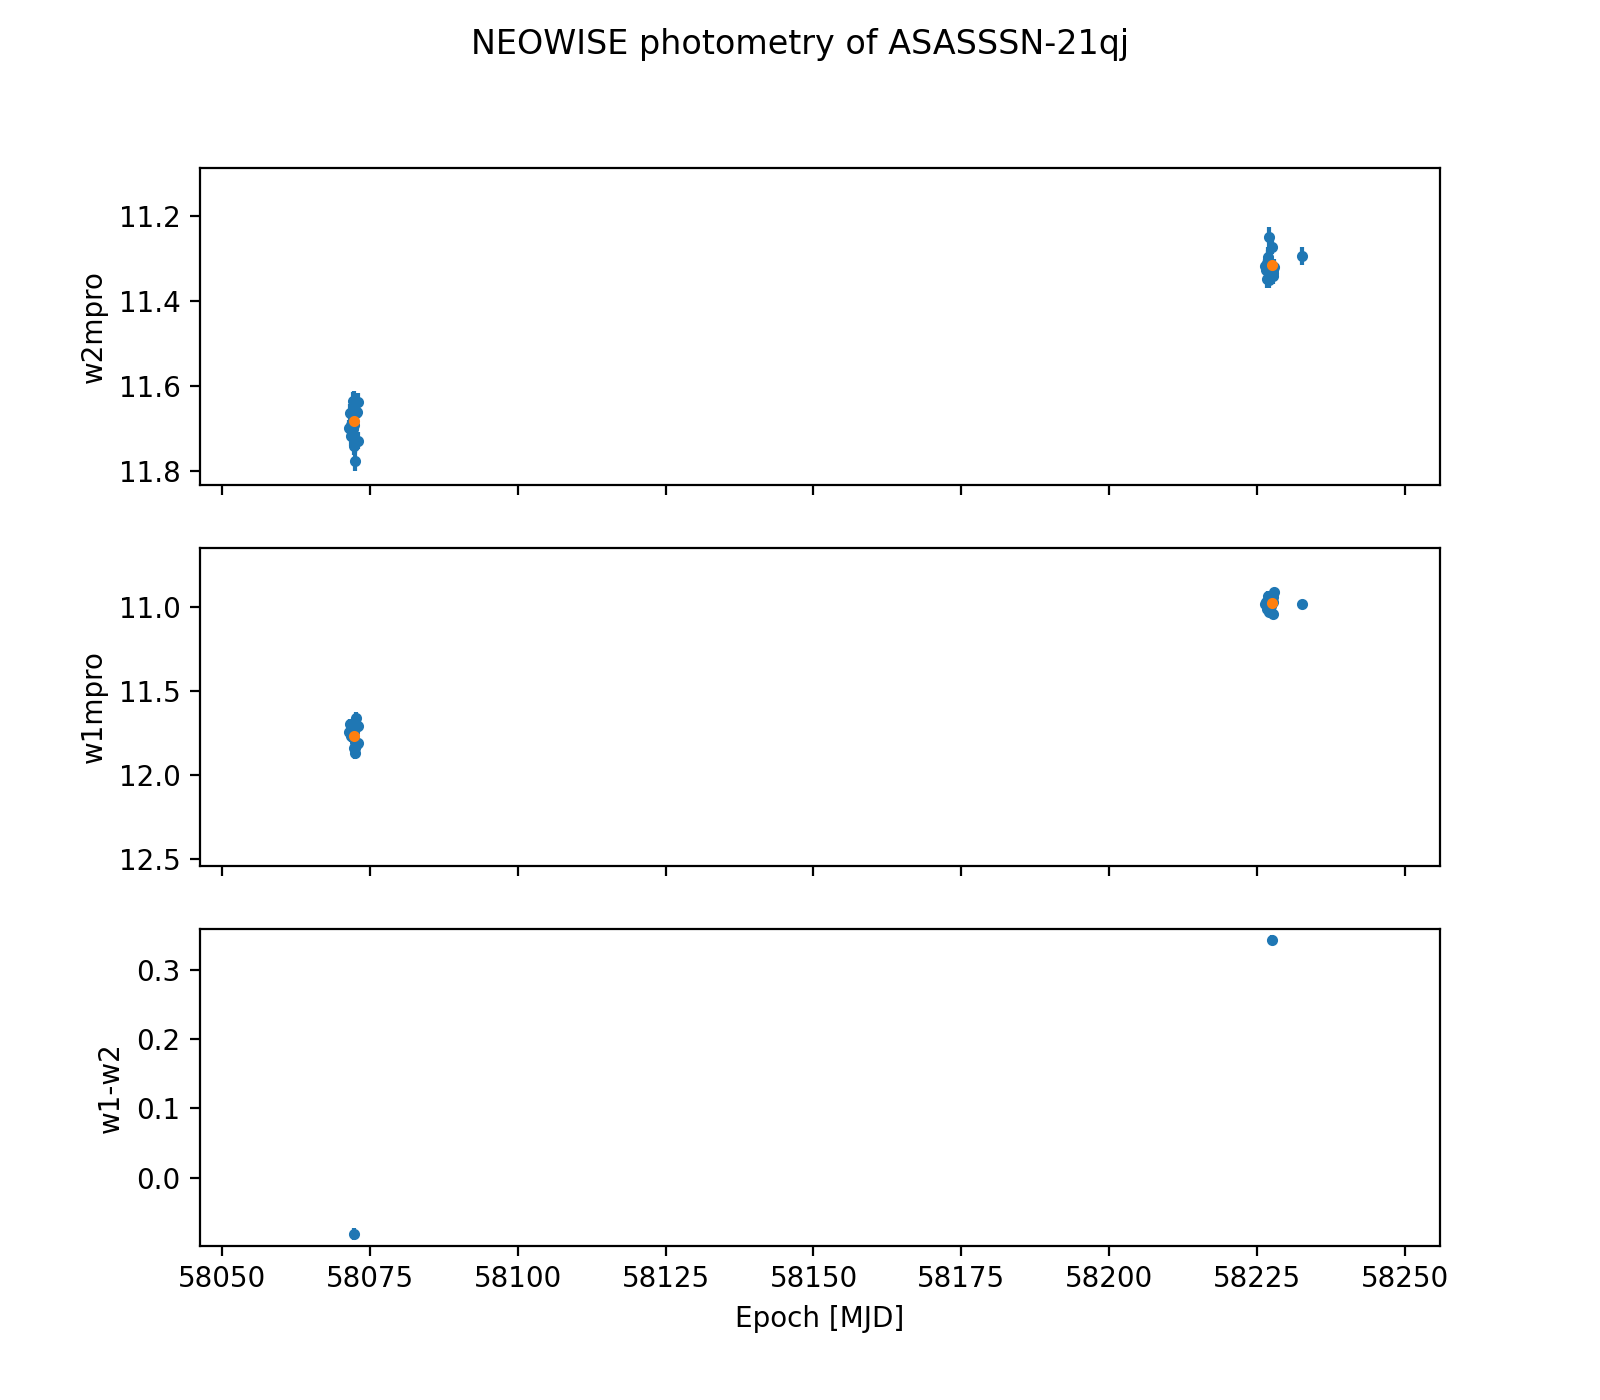

[-0.06463157894736504+/-0.00854708322054649
 -0.1056363636363642+/-0.008531298720080058
 -0.08544444444444466+/-0.00904532482747678
 -0.0637037037037036+/-0.007636099378440615
 -0.0705000000000009+/-0.008923543557893892
 -0.05604545454545118+/-0.008697867127174538
 -0.08733333333333348+/-0.010676245698850426
 -0.08125000000000071+/-0.008862843787408191
 0.3427647058823542+/-0.007535383661129355
 0.3310526315789488+/-0.006927803391681596
 0.3371999999999975+/-0.007867796529030363
 0.31104545454545374+/-0.006436755252595687
 0.32588235294117496+/-0.0074548235702575705
 0.2151999999999994+/-0.007318469785412795
 0.1842499999999987+/-0.007145628033979938
 0.1823809523809512+/-0.00734414787000561]


In [68]:
fig, ax = plt.subplots(3,1,figsize=(8,7),sharex=True)
ax[0].errorbar(t['mjd'],t['w1mpro'],yerr=t['w1sigmpro'],fmt='.')
ax[0].invert_yaxis()
ax[1].errorbar(t['mjd'],t['w2mpro'],yerr=t['w2sigmpro'],fmt='.')
ax[1].invert_yaxis()

ax[2].set_xlabel('Epoch [MJD]')
ax[0].set_ylabel('w2mpro')
ax[1].set_ylabel('w1mpro')
ax[2].set_ylabel('w1-w2')

import uncertainties
from uncertainties.umath import *
from uncertainties import unumpy
from uncertainties import umath

t_s = 56787
t_e = 59532
nmag = 16

wt = np.zeros(nmag)
w1 = unumpy.uarray(wt,wt)
w2 = unumpy.uarray(wt,wt)
wcol = unumpy.uarray(wt,wt)

for (j,i) in enumerate(np.linspace(t_s, t_e, 16)):
#    ax[0].scatter(i-60,11.4)
#    ax[0].scatter(i+60,11.4)
#    ax[1].scatter(i-60,11.4)
#    ax[1].scatter(i+60,11.4)
    m = (t['mjd']>(i-60))*(t['mjd']<(i+60))

    w_time = t['mjd'][m]

    w1_mag = t['w1mpro'][m]
    w1_sig = t['w1sigmpro'][m]
    w2_mag = t['w2mpro'][m]
    w2_sig = t['w2sigmpro'][m]
    
    w1all = unumpy.uarray(w1_mag, w1_sig)
    w2all = unumpy.uarray(w2_mag, w2_sig)

    w1mean = w1all.mean()
    w2mean = w2all.mean()

    w1w2col = w1mean-w2mean

    w1[j] = w1mean
    w2[j] = w2mean
    wcol[j] = w1w2col
    wt[j] = np.average(t['mjd'][m])

ax[0].errorbar(wt,unumpy.nominal_values(w1),yerr=unumpy.std_devs(w1),fmt='.')
ax[1].errorbar(wt,unumpy.nominal_values(w2),yerr=unumpy.std_devs(w2),fmt='.')
ax[2].errorbar(wt,unumpy.nominal_values(wcol),yerr=unumpy.std_devs(wcol),fmt='.')
fig.suptitle("NEOWISE photometry of ASASSSN-21qj")
print(wcol)
fig.savefig("NEOWISE_ASASSN-21dj.pdf")

In [52]:
sin?